In [4]:
import numpy as np
import segyio
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import copy
import matplotlib

In [5]:
from ukpgks import segy
vp    = segy.read_model('vp_example.sgy')

In [7]:
# https://stackoverflow.com 
def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))
def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = colors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

In [8]:
# pick colors                                                                                                                                           
# red, red 70%, orange, gold, khaki, aquamarine, blue, indigo
hex_list = ['#FF0000','#ff6666','#FFA500','#FFD700','#F0E68C','7FFFD4','#00FFFF','#0000FF','4B0082']
test_cmap = get_continuous_cmap(hex_list)

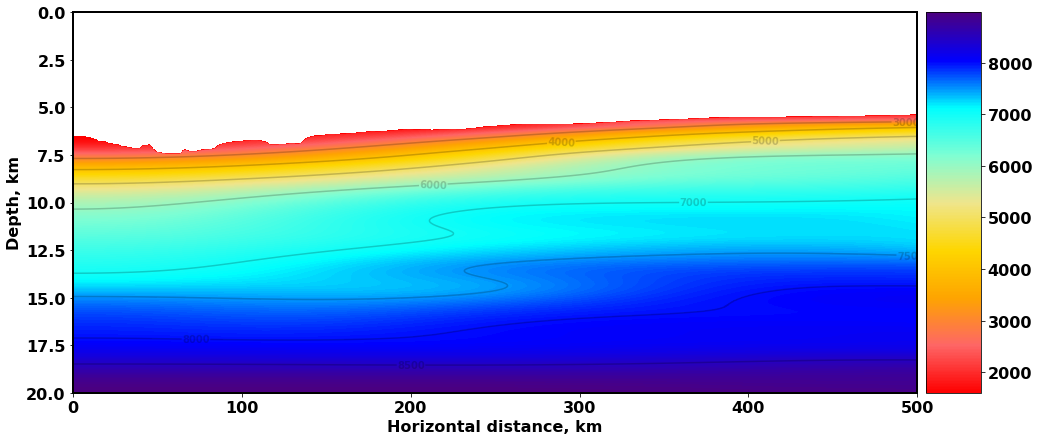

In [9]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams.update({'font.size': 16})

figsize=(18,7)
extent=[0, 500, 20, 0]

test_cmap.set_under('white')

labels = ['Horizontal distance, km','Depth, km','title']
fig,ax = plt.subplots(figsize=figsize)
levels=np.array([3000,4000,5000,6000,7000,7500,8000,8500])
CS = ax.contour(vp.T, levels, colors='k', origin='upper', extent=extent,alpha=0.2)
ax.clabel(CS, inline=True, fontsize=10,fmt='%1.0f')

im = ax.imshow(vp.T,extent=extent,aspect='auto',cmap=test_cmap,vmin=1600)
cbar = plt.colorbar(im,ax=ax,pad=0.009,aspect=7)

# cbar.set_label('Velocity m/s',fontsize=16)
im.axes.set_xlabel(labels[0],fontsize=16)
im.axes.set_ylabel(labels[1],fontsize=16)

# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

plt.ylim(0,20)
plt.gca().invert_yaxis()
# fig.savefig(out + '.png',dpi=500,transparent=True)
plt.show()